In [13]:
import matplotlib.pyplot as plt
import math

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np
from qiskit.circuit.library import C3XGate
from qiskit.visualization import plot_histogram
from qiskit.providers.ibmq import least_busy
from qiskit.circuit.library import MCMT

#from qiskit.circuit.library import GroverOperator, MCMT, ZGate

In [14]:
num_qubits = 4
circuit = QuantumCircuit(num_qubits)
c3z= MCMT('cz',3-1,1)

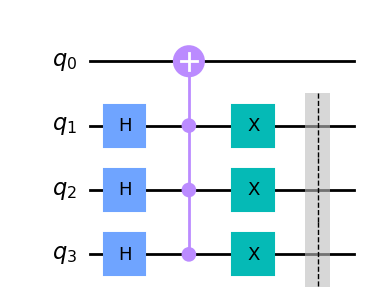

In [15]:
for i in range(num_qubits-1):
    circuit.h(i+1)


circuit.append(C3XGate(), [2, 3, 1, 0])

for i in range(num_qubits-1):
    circuit.x(i+1)
    circuit.barrier(i+1)

circuit.draw("mpl")


In [16]:
Ans= input("There are 8 questions, which question would you like to be YES?\n ")

There are 8 questions, which question would you like to be YES?
 6


101


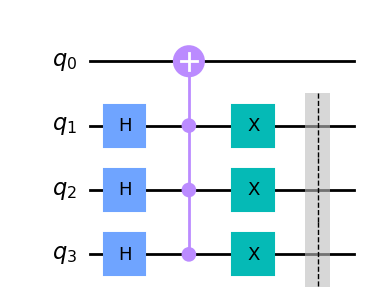

In [17]:
binary = np.binary_repr(int(Ans)-1,3)
#for i in range(int(Ans)-1):
#    circuit.x(i+1)
print(binary,)
circuit.draw("mpl")

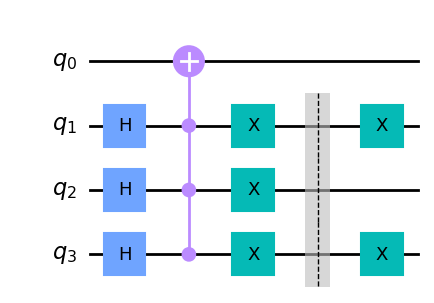

In [18]:
n = 1
for i in binary:
    if i == "1":
        circuit.x(num_qubits-n)
    n=n+1
#circuit.measure_all()    
circuit.draw("mpl")


In [19]:
#lets check the value of the qubits using a simulator!
from qiskit import transpile 
from qiskit import IBMQ
#IBMQ.save_account('')
# Use AerSimulator
from qiskit import Aer

In [22]:

circuit.barrier(1,2,3)

#Black box
circuit.x(2)
circuit.compose(c3z,qubits=[1,2,3],inplace=True)
circuit.x(2)





def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

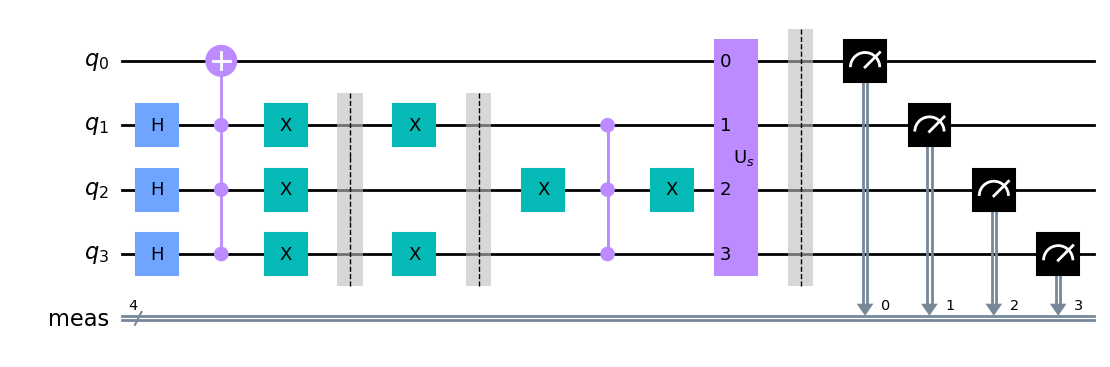

In [23]:



circuit.append(diffuser(4), [0,1,2,3])



circuit.measure_all()
circuit.draw("mpl")

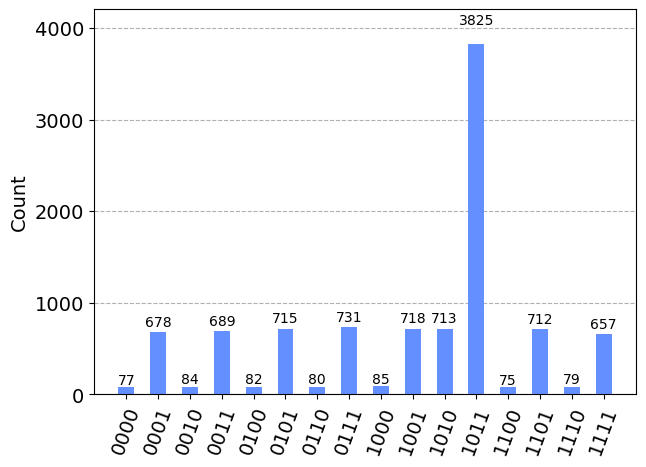

In [24]:
sim = Aer.get_backend('aer_simulator')
transpiled_circuit = transpile(circuit, sim)
result = sim.run(transpiled_circuit, shots=10000).result()
counts = result.get_counts()
plot_histogram(counts)